In [1]:
import pandas as pd #for data importing and manupulation
import numpy as np  #for data manupulation and cleaning
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 

In [2]:
from scipy.stats import hmean, gmean

In [231]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sub = pd.read_csv('sample_submission (2).csv')

In [232]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [202]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [203]:
train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [204]:
len(sub)

3068

In [205]:
train.shape, test.shape

((7160, 14), (3069, 13))

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [184]:
#train['Geo_Code'].value_counts()

In [185]:
#test['Geo_Code'].value_counts()

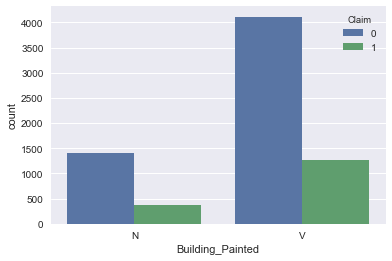

In [15]:
sns.countplot(train['Building_Painted'], hue='Claim', data=train)

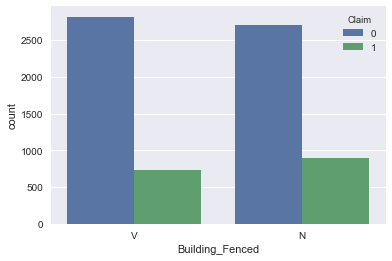

In [16]:
sns.countplot(train['Building_Fenced'], hue='Claim', data=train)

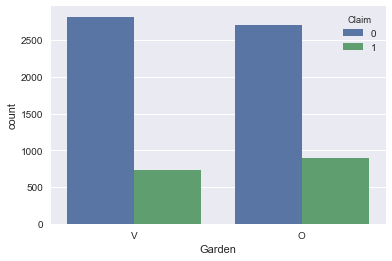

In [17]:
sns.countplot(train['Garden'], hue='Claim', data=train)

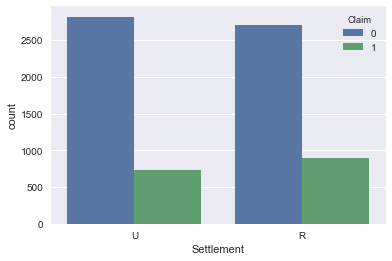

In [18]:
sns.countplot(train['Settlement'], hue='Claim', data=train)

In [23]:
pd.crosstab(train['Building_Type'],train['Claim'], normalize=True)

Claim,0,1
Building_Type,,
1,0.197207,0.042458
2,0.362151,0.099441
3,0.128352,0.043436
4,0.084078,0.042877


In [24]:
pd.crosstab(train['NumberOfWindows'],train['Claim'], normalize=True)

Claim,0,1
NumberOfWindows,,
.,0.393715,0.102235
1,0.009497,0.000978
2,0.045112,0.005587
3,0.099581,0.018296
4,0.100140,0.031006
5,0.062430,0.026816
6,0.028073,0.014665
7,0.016899,0.012570
8,0.008520,0.007682


In [25]:
train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [27]:
train.dtypes[train.dtypes == 'float64']

Insured_Period        float64
Building Dimension    float64
Date_of_Occupancy     float64
dtype: object

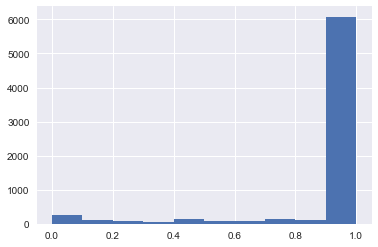

In [30]:
train['Insured_Period'].hist()

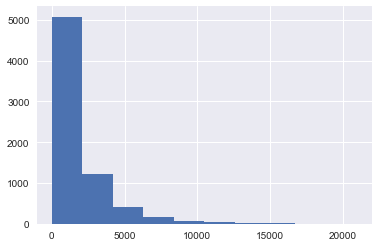

In [31]:
train['Building Dimension'].hist()

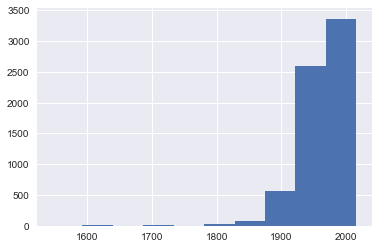

In [33]:
train['Date_of_Occupancy'].hist()

In [34]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [36]:
train['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
0.832877      28
0.246575      27
0.997260      26
0.994536      24
0.915068      23
0.161644      23
0.084932      22
0.967213      22
0.665753      21
0.983562      17
0.580822      16
0.413699      16
0.328767      13
0.751366      12
0.748634      12
0.915301      12
0.836066      10
0.248634       9
0.579235       9
0.494536       9
0.084699       8
0.502732       8
0.251366       8
0.163934       7
0.989071       6
            ... 
0.789617       1
0.978082       1
0.860274       1
0.341530       1
0.450820       1
0.663014       1
0.597260       1
0.534247       1
0.202186       1
0.994521       1
0.106849       1
0.295082       1
0.454795       1
0.435616       1
0.972678       1
0.805479       1
0.032787       1
0.901639       1
0.646575       1
0.434426       1
0.420765       1
0.453552       1
0.688525       1
0.484932       1
0.887978       1
0.680328       1
0.819672       1
0.792350      

In [40]:
#pd.crosstab(train['Insured_Period'],train['Claim'])

In [41]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [44]:
pd.crosstab(train['Residential'],train['Claim'], normalize=True) * 100

Claim,0,1
Residential,,
0,54.832402,14.622905
1,22.346369,8.198324


In [233]:
train['Building_Fenced'] = train['Building_Fenced'].replace({'N':1, 'V':0})
train['Building_Painted'] = train['Building_Painted'].replace({'N':1, 'V':0})
train['Garden'] = train['Garden'].replace({'V':1, 'O':0})
train['Settlement'] = train['Settlement'].replace({'U':1, 'R':0})

In [234]:
test['Building_Fenced'] = test['Building_Fenced'].replace({'N':1, 'V':0})
test['Building_Painted'] = test['Building_Painted'].replace({'N':1, 'V':0})
test['Garden'] = test['Garden'].replace({'V':1, 'O':0})
test['Settlement'] = test['Settlement'].replace({'U':1, 'R':0})

In [188]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7153.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,0.248324,0.503911,0.496435,0.495810,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,0.432071,0.500020,0.500022,0.500017,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,0.000000,0.000000,0.000000,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [189]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [190]:
test['NumberOfWindows'].value_counts()

   .    2240
3        227
4        194
5        151
2         70
6         70
7         54
8         26
1         16
>=10      11
9         10
Name: NumberOfWindows, dtype: int64

In [191]:
train['Building Dimension'].mean()

1883.7275304791608

In [192]:
test['Building Dimension'].mean()

1666.7905759162304

In [235]:
train['Building Dimension'] = train['Building Dimension'].fillna(value=1083.0)
test['Building Dimension'] = test['Building Dimension'].fillna(value=900.0)

In [236]:
train['Geo_Code'] = train['Geo_Code'].fillna(value=-1)
test['Geo_Code'] = test['Geo_Code'].fillna(value=-1)

In [237]:
train['Date_of_Occupancy'] = train['Date_of_Occupancy'].fillna(value=-1)
test['Date_of_Occupancy'] = test['Date_of_Occupancy'].fillna(value=-1)

In [238]:
train['Garden'] = train['Garden'].fillna(value=-1)
test['Garden'] = test['Garden'].fillna(value=-1)

In [197]:
train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

In [153]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1053,0


In [154]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,0,1,0.0,0,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,0,1,0.0,0,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,0,0,1.0,1,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,0,1,0.0,0,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,0,1,0.0,0,1405.0,1,2004.0,3,3321


In [239]:
wind_train = pd.get_dummies(train['NumberOfWindows'])
wind_test = pd.get_dummies(test['NumberOfWindows'])

In [240]:
train = pd.concat([train, wind_train], axis=1)
test = pd.concat([test, wind_test], axis=1)

In [241]:
train = train.drop('NumberOfWindows', axis=1)
test = test.drop('NumberOfWindows', axis=1)

In [198]:
#train = pd.get_dummies(train)
#test = pd.get_dummies(test)

In [242]:
train['Geo_Code'] = train['Geo_Code'].map(train['Geo_Code'].value_counts().to_dict())
test['Geo_Code'] = test['Geo_Code'].map(test['Geo_Code'].value_counts().to_dict())

In [243]:
train.to_csv('ins1_train.csv', index=False)
test.to_csv('ins1_test.csv', index=False)

# more advance feature

In [218]:
train.corr()['Claim']

YearOfObservation    -0.016367
Insured_Period        0.088715
Residential           0.063509
Building_Painted     -0.029857
Building_Fenced       0.051657
Garden               -0.052236
Settlement           -0.052019
Building Dimension    0.295558
Building_Type         0.112168
Date_of_Occupancy     0.019288
Claim                 1.000000
   .                 -0.052171
1                    -0.033066
2                    -0.064988
3                    -0.063584
4                     0.007600
5                     0.053896
6                     0.057861
7                     0.082347
8                     0.075198
9                     0.055776
>=10                  0.068126
Name: Claim, dtype: float64

In [121]:
train.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
YearOfObservation,1.000000,0.025434,-0.040391,-0.056881,0.120373,-0.119031,-0.120103,0.010959,0.005490,0.041636,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,0.037077,0.047091,-0.047744,-0.046504,0.008822,-0.017811,0.182661,0.088715
Residential,-0.040391,-0.037620,1.000000,0.032927,0.082448,-0.081257,-0.082684,0.056357,0.334039,-0.081502,0.063509
Building_Painted,-0.056881,0.037077,0.032927,1.000000,-0.574757,0.573813,0.575081,-0.089176,0.048541,-0.028621,-0.029857
Building_Fenced,0.120373,0.047091,0.082448,-0.574757,1.000000,-0.997784,-0.999441,0.136512,0.020430,0.266582,0.051657
Garden,-0.119031,-0.047744,-0.081257,0.573813,-0.997784,1.000000,0.997783,-0.137255,-0.018432,-0.266205,-0.052236
Settlement,-0.120103,-0.046504,-0.082684,0.575081,-0.999441,0.997783,1.000000,-0.136369,-0.020320,-0.265657,-0.052019
Building Dimension,0.010959,0.008822,0.056357,-0.089176,0.136512,-0.137255,-0.136369,1.000000,0.009184,0.090890,0.295558
Building_Type,0.005490,-0.017811,0.334039,0.048541,0.020430,-0.018432,-0.020320,0.009184,1.000000,-0.086072,0.112168
Date_of_Occupancy,0.041636,0.182661,-0.081502,-0.028621,0.266582,-0.266205,-0.265657,0.090890,-0.086072,1.000000,0.019288


In [122]:
pd.crosstab(train['Settlement'],train['Garden'])

Garden,-1.0,0.0,1.0
Settlement,,,
0,7,3602,1
1,0,0,3550


In [92]:
pd.crosstab(train['Settlement'],train['Building_Fenced'])

Building_Fenced,0,1
Settlement,,
0,2,3608
1,3550,0


In [93]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1053,0


In [244]:
train['paint_fence'] = train['Building_Painted'] + train['Building_Fenced']
train['paint_fence'] = train['Building_Painted'] + train['Garden']
train['paint_fence'] = train['Building_Painted'] + train['Residential']

In [245]:
test['paint_fence'] = test['Building_Painted'] + test['Building_Fenced']
test['paint_fence'] = test['Building_Painted'] + test['Garden']
test['paint_fence'] = test['Building_Painted'] + test['Residential']

In [246]:
train.to_csv('ins2_train.csv', index=False)
test.to_csv('ins2_test.csv', index=False)

# feature engineer 3

In [167]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,paint_fence
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,.,1053,0,1
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1053,0,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,.,1053,0,1
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,.,1053,0,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1053,0,0


In [222]:
#train['Geo_Code'] = train['Geo_Code'].map(train['Geo_Code'].value_counts().to_dict())

In [247]:
#test['Geo_Code'] = test['Geo_Code'].map(test['Geo_Code'].value_counts().to_dict())

In [248]:
train['Insured_Period_r'] = train['Insured_Period'].round(1)
test['Insured_Period_r'] = test['Insured_Period'].round(1)

In [249]:
test['Insured_Period_r'].value_counts()

1.0    2647
0.2      63
0.7      58
0.5      53
0.0      43
0.3      42
0.9      38
0.4      37
0.1      32
0.8      29
0.6      27
Name: Insured_Period_r, dtype: int64

In [250]:
def month(x):
    if x == 0.0:
        return 1
    elif x == 0.1:
        return 2
    elif x == 0.2:
        return 3
    elif x == 0.3:
        return 4
    elif x == 0.4:
        return 5
    elif x == 0.5:
        return 6
    elif x == 0.6:
        return 7
    elif x == 0.7:
        return 8
    elif x == 0.8:
        return 9
    elif x == 0.9:
        return 10
    else:
        return 12

In [251]:
train['month'] = train['Insured_Period_r'].apply(month)
test['month'] = test['Insured_Period_r'].apply(month)

In [252]:
train = train.drop('Insured_Period_r', axis=1)
test = test.drop('Insured_Period_r', axis=1)

In [253]:
train.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,...,3,4,5,6,7,8,9,>=10,paint_fence,month
YearOfObservation,1.000000,0.025434,-0.040391,-0.056881,0.120373,-0.119031,-0.120103,0.010959,0.005490,0.041636,...,0.027514,0.070955,0.022006,0.043974,0.007594,0.030647,-0.007111,0.003292,-0.067277,0.031222
Insured_Period,0.025434,1.000000,-0.037620,0.037077,0.047091,-0.047744,-0.046504,0.008822,-0.017811,0.182661,...,0.009733,0.031148,0.024436,0.019055,-0.006668,0.012417,-0.018813,0.008783,-0.002039,0.995839
Residential,-0.040391,-0.037620,1.000000,0.032927,0.082448,-0.081257,-0.082684,0.056357,0.334039,-0.081502,...,-0.029900,-0.005223,0.032779,0.086251,0.094223,0.068616,0.033224,0.011133,0.739824,-0.039090
Building_Painted,-0.056881,0.037077,0.032927,1.000000,-0.574757,0.573813,0.575081,-0.089176,0.048541,-0.028621,...,-0.209106,-0.223304,-0.177656,-0.119848,-0.096332,-0.073759,-0.043791,-0.055862,0.696796,0.034825
Building_Fenced,0.120373,0.047091,0.082448,-0.574757,1.000000,-0.997784,-0.999441,0.136512,0.020430,0.266582,...,0.362705,0.385484,0.310596,0.209649,0.172895,0.127328,0.082364,0.093532,-0.327737,0.047404
Garden,-0.119031,-0.047744,-0.081257,0.573813,-0.997784,1.000000,0.997783,-0.137255,-0.018432,-0.266205,...,-0.363077,-0.383952,-0.311626,-0.208367,-0.171839,-0.126549,-0.081860,-0.095844,0.327956,-0.048090
Settlement,-0.120103,-0.046504,-0.082684,0.575081,-0.999441,0.997783,1.000000,-0.136369,-0.020320,-0.265657,...,-0.362502,-0.385268,-0.310423,-0.209531,-0.172799,-0.127256,-0.082318,-0.096379,0.327785,-0.046802
Building Dimension,0.010959,0.008822,0.056357,-0.089176,0.136512,-0.137255,-0.136369,1.000000,0.009184,0.090890,...,-0.087850,-0.010729,0.096021,0.126407,0.122390,0.142835,0.102398,0.216200,-0.019586,0.007485
Building_Type,0.005490,-0.017811,0.334039,0.048541,0.020430,-0.018432,-0.020320,0.009184,1.000000,-0.086072,...,-0.088880,-0.043411,0.027669,0.090353,0.141140,0.099293,0.053826,-0.002258,0.272402,-0.016147
Date_of_Occupancy,0.041636,0.182661,-0.081502,-0.028621,0.266582,-0.266205,-0.265657,0.090890,-0.086072,1.000000,...,0.094462,0.100408,0.083605,0.056362,0.044826,0.032374,0.023069,0.027780,-0.077757,0.175642


In [254]:
train.to_csv('ins3_train.csv', index=False)
test.to_csv('ins3_test.csv', index=False)

In [143]:
train.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
paint_fence           0
month                 0
dtype: int64